In [1]:
!python --version

Python 3.11.7


In [2]:
# Import Libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

# Change setting in pandas to display all columns
pd.options.display.max_columns = None

### Data Import

In [4]:
# Import medical dataset
medicalDF =pd.read_csv(r"C:\Users\ashle\Desktop\MSDA WGU\Data Mining 1 - D209\Medical Data\medical_clean.csv")

In [5]:
medicalDF

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.910430,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [6]:
medicalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

### Data Cleaning

In [8]:
# Create a copy of the data frame for cleaning the data.
medicalClean = medicalDF.copy()

In [9]:
# Indentify duplicates 
duplicates = medicalClean[medicalClean.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Job, Children, Age, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, vitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []


In [10]:
# Identify null values in the dataframe.
missingValues = medicalClean.isnull().sum().sum()
print(missingValues)

0


In [11]:
#Identifying Outliers
#Define column variable with all the numeric columns in the data frame
columns = ['Lat', 'Lng', 'Children', 'Age', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Population', 'Income']
print("\n\n\033[1m Count of Outliers: ")
#Loop through each numeric column to find outliers
for i in columns:
    #print(")
    # Calculating the first quartile, the third quartile, and the interquartile range. [In-Text Citation: (Hackers Realm)]
    Q1 = medicalClean[i].quantile(0.25)
    Q3 = medicalClean[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Identify outliers
    outliers = medicalClean[(medicalClean[i] < lower_bound) | (medicalClean[i] > upper_bound)]
    #Printing the count and range of outliers
    print("\n\033[1m " + i + ": \033[0m" + "Count of outliers: " + str(len(outliers)))


# Cleaning Outliers
# Z-score capping to cap all columns with outliers with a threshold set at 3 standard deviations from the mean. 
outlierColumns = ['Lat', 'Lng', 'Children', 'VitD_levels', 'Full_meals_eaten', 'vitD_supp', 'Population', 'Income']
print("\n\n\033[1m Upper and Lower Threshold for Each Column: ")
# Loop through each column that has outliers.
for i in outlierColumns: 
    # Calculate the upper and lower threshold using the Interquartile Range (IQR) method. 
    upperThreshold = medicalClean[i].mean() + 3*medicalClean[i].std()
    lowerThreshold = medicalClean[i].mean() - 3*medicalClean[i].std()
    #Print upper and lower threshold for each column
    print("\n\033[1m" + i + ": \033[0m Upper: " + str(upperThreshold) + ' Lower: ' + str(lowerThreshold))
    
    #Capping outliers for each column on upper and lower limit
    medicalClean.loc[(medicalClean[i]>=upperThreshold), i] = int(upperThreshold)
    medicalClean.loc[(medicalClean[i]<=lowerThreshold), i] = int(lowerThreshold)

# Print a count of outliers after cleaning.
print("\n\n\033[1m Count of Outliers After Cleaning: ")
for i in columns:   
    outliers_ = medicalClean[(medicalClean[i] < lowerThreshold) | (medicalClean[i] > upperThreshold)]
    print("\n\033[1m " + i + ": \033[0m" + "Count of Outliers: " + str(len(outliers_)))




 Count of Outliers: 

 Lat: Count of outliers: 150

 Lng: Count of outliers: 237

 Children: Count of outliers: 411

 Age: Count of outliers: 0

 VitD_levels: Count of outliers: 60

 Doc_visits: Count of outliers: 0

 Full_meals_eaten: Count of outliers: 8

 vitD_supp: Count of outliers: 70

 Population: Count of outliers: 855

 Income: Count of outliers: 326


 Upper and Lower Threshold for Each Column: 

Lat:  Upper: 54.96035457062313 Lower: 22.541842743376883

Lng:  Upper: -45.62508628113814 Lower: -136.86107321886186

Children:  Upper: 8.58817702339697 Lower: -4.39377702339697

VitD_levels:  Upper: 24.015954780441817 Lower: 11.912568529284187

Full_meals_eaten:  Upper: 4.0257506790224005 Lower: -2.0229506790224008

vitD_supp:  Upper: 2.2844144195850116 Lower: -1.4866144195850117

Population:  Upper: 54439.52964287172 Lower: -34509.02204287172

Income:  Upper: 126053.95503955189 Lower: -45072.964719551885


 Count of Outliers After Cleaning: 

 Lat: Count of Outliers: 0

 Lng: Cou

In [12]:
# Re-express all yes/no categorical variables to be expressed as 1/0.
# Create a variable for categorical columns that need to be replaced.
yes_no_Columns = ['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                      'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Overweight', 'Anxiety']
# Loop through each column and use replace to change yes/no values to 1/0.
for i in yes_no_Columns:
        medicalClean[i].replace(to_replace =['Yes','No'], value = [1,0], inplace = True)

columns = ['Initial_admin', 'Complication_risk', 'Gender', 'Services', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', ]
for col in columns:
    label_encoder = LabelEncoder()
    encodedLabels = label_encoder.fit_transform(medicalClean[col])
    medicalClean[col] = encodedLabels

medicalClean.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID'],axis=1,inplace=True)

In [13]:
medicalClean

,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1675,1,975,35621,34.34960,-86.72508,2951,1,3,478,1,53,86575.93,0,1,0,19.141466,6,0,0,0,1,1,0,2,0,1,1,0,1,1,1,0,1,0,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,3232,9,712,32446,30.84513,-85.22907,11303,2,3,124,3,51,46805.99,1,0,0,18.940352,4,2,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,2,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,5021,42,951,57110,43.54321,-96.63772,17125,1,3,94,3,53,14370.14,4,0,0,18.057507,4,1,0,0,0,1,0,2,1,0,1,0,0,0,0,0,0,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,3782,23,1514,56072,43.89744,-93.51479,2162,1,3,177,0,78,39741.49,1,1,0,16.576858,4,1,0,0,0,0,1,2,0,1,0,0,0,0,0,1,1,0,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5814,46,766,23181,37.59894,-76.88958,5287,0,16,285,1,22,1209.56,4,0,0,17.439069,5,0,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3855,27,1511,27563,36.42886,-78.23716,4762,2,16,467,2,25,45967.61,4,1,0,16.980860,4,2,1,0,1,1,0,2,0,0,0,0,0,1,0,1,0,2,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,3482,31,62,8340,39.43609,-74.87302,1251,2,16,512,4,87,14983.02,4,1,1,18.177020,5,0,0,0,0,1,0,2,1,1,1,0,0,0,0,0,1,1,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,5125,43,968,37171,36.36655,-87.29988,532,0,3,476,3,45,65917.81,3,0,1,17.129070,4,2,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,2,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,4467,42,1108,57775,44.10354,-102.01590,271,0,4,419,3,43,29702.32,0,1,1,19.910430,5,2,1,0,1,0,0,2,1,0,0,0,1,0,0,0,0,0,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [14]:
medicalClean.loc[medicalClean.ReAdmis == 1].shape

(3669, 46)

In [15]:
medicalClean.loc[medicalClean.ReAdmis == 0].shape

(6331, 46)

### Selecting Variables and Scaling the Data

In [17]:
# Using SelectKBest to identify the features with the highest p values
X = medicalClean.drop(["ReAdmis", "TotalCharge"],axis=1)
y = medicalClean['ReAdmis']
feature_names = X.columns
skbest = SelectKBest( k='all')
X_new = skbest.fit_transform(X, y)
print(X_new.shape)
# Finding p-values greater than .05 to select statiscially significant columns
p_values = pd.DataFrame({'Feature':X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value']<.05]
features_to_keep = p_values['Feature'][p_values['p_value']<.05]
print(features_to_keep)
predictors = medicalClean[features_to_keep]

# Scaling the data 
scaler = StandardScaler()
scaled_predictors = scaler.fit_transform(predictors)
# Setting the scaled data to a pandas dataframe
CleanedData = pd.DataFrame(scaled_predictors, columns=predictors.columns)

(10000, 44)
34    Initial_days
10        Children
Name: Feature, dtype: object


In [18]:
CleanedData

,Initial_days,Children
0,-0.907310,-0.515910
1,-0.734595,0.450575
2,-1.128292,0.450575
3,-1.244503,-0.999152
4,-1.261991,-0.515910
...,...,...
9995,0.650217,-0.032667
9996,1.300475,0.933818
9997,1.356958,0.450575
9998,1.098585,0.450575


In [19]:
# Export cleaned data
#CleanedData.to_csv(r'C:\Users\ashle\Desktop\MSDA WGU\Data Mining 1 - D209\PA Task 1 - Python K-nearest neighbor\cleaned dataset\CleanedData.csv')

## Splitting the data

In [21]:
# Splitting the data into train/test sets
X = CleanedData
y = medicalClean['ReAdmis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33, stratify=y)

In [22]:
#Export train and test sets
X_train.to_csv(r'C:\Users\ashle\Desktop\MSDA WGU\Data Mining 1 - D209\PA Task 1 - Python K-nearest neighbor\cleaned dataset\X_train.csv')
X_test.to_csv(r'C:\Users\ashle\Desktop\MSDA WGU\Data Mining 1 - D209\PA Task 1 - Python K-nearest neighbor\cleaned dataset\X_test.csv')
y_train.to_csv(r'C:\Users\ashle\Desktop\MSDA WGU\Data Mining 1 - D209\PA Task 1 - Python K-nearest neighbor\cleaned dataset\y_train.csv')
y_test.to_csv(r'C:\Users\ashle\Desktop\MSDA WGU\Data Mining 1 - D209\PA Task 1 - Python K-nearest neighbor\cleaned dataset\y_test.csv')

## Indentify Optimal K Value

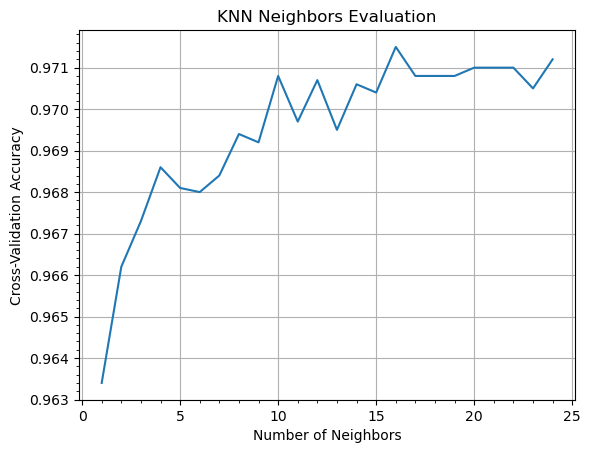

In [24]:
# Range of k values to try
k_values = range(1, 25)
cross_validation_scores = []

# Perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

# Plotting accuracy vs. k values
plt.plot(k_values, cross_validation_scores)
plt.minorticks_on()
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Neighbors Evaluation')
plt.grid(True)
plt.show()

## Perform KNN

In [26]:
# Perform KNN test
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [27]:
# Pring accuracy and AUC
print(f"\033[1mAccuracy Score: \033[0m {knn.score(X_test, y_test)}")
y_pred_prob = knn.predict_proba(X_test)[:,1]
print(f"\033[1mArea Under the Curve (AUC): \033[0m {roc_auc_score(y_test, y_pred_prob)}")

Accuracy Score:  0.9755
Area Under the Curve (AUC):  0.9966063811011963
